In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in files
sad_mlsq = pd.read_csv("ProcessedData/sad_mlsq.csv",index_col=0)
mrdi_mlsq = pd.read_csv("ProcessedData/mrdi_mlsq.csv",index_col=0)
sar_mlsq = pd.read_csv("ProcessedData/sar_mlsq.csv",index_col=0)

# Indigenous v introduced
sad_mlsq_i = pd.read_csv("ProcessedData/sad_mlsq_indigenous.csv",index_col=0)
mrdi_mlsq_i = pd.read_csv("ProcessedData/mrdi_mlsq_indigenous.csv",index_col=0)
sar_mlsq_i = pd.read_csv("ProcessedData/sar_mlsq_indigenous.csv",index_col=0)

# KS
sad_ks = pd.read_csv("ProcessedData/sad_means_ksD_R.csv",index_col=0)
sad_ks = sad_ks.T # Make this the same direction as the others
mrdi_ks = pd.read_csv("ProcessedData/mrdi_means_ksD.csv",index_col=0)

# Hard code number of sites and labels
lu = sad_mlsq.columns
lu_sites = pd.Series(np.array([12,44,24,16]),index=lu)

In [4]:
# Make xlabels
xlabels = []
for l in lu:
    # For the semi-natural pasture, there actually aren't as many sites for the SAR
    if l=='Semi-natural pasture':
        xlabels.append('{}\n{} sites (SAD & MRDI)\n10 sites (SAR)'.format(l,lu_sites[l]))
    else:
        xlabels.append('{}\n{} sites'.format(l,lu_sites[l]))

# Overall plot

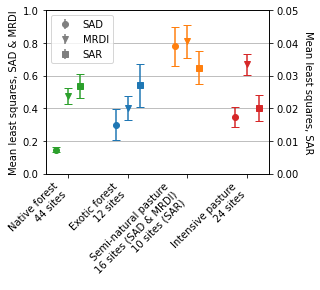

In [6]:
fig,ax = plt.subplots(figsize=(4,3))
y2 = ax.twinx()
clist = ['tab:blue','tab:green','tab:red','tab:orange']
xlist = np.array([2,1,4,3])
for i in np.arange(len(clist)):
    ax.errorbar(x=xlist[i]-0.2,y=sad_mlsq.loc['Mean'][i],yerr=sad_mlsq.loc['Standard error'][i],
                 fmt='o',capsize=4,c=clist[i],label='SAD')
    ax.errorbar(x=xlist[i],y=mrdi_mlsq.loc['Mean'][i],yerr=mrdi_mlsq.loc['Standard error'][i],
                 fmt='v',capsize=4,c=clist[i],label='MRDI')
    y2.errorbar(x=xlist[i]+0.2,y=sar_mlsq.loc['Mean'][i],yerr=sar_mlsq.loc['Standard error'][i],
                 fmt='s',capsize=4,c=clist[i],label='SAR')
    if (i == len(clist)-1):
        psad = ax.errorbar(x=[],y=[],yerr=[],
                     fmt='o',capsize=4,c='tab:gray',label='SAD')
        pmrdi = ax.errorbar(x=[],y=[],yerr=[],
                     fmt='v',capsize=4,c='tab:gray',label='MRDI')
        psar = y2.errorbar(x=[],y=[],yerr=[],
                     fmt='s',capsize=4,c='tab:gray',label='SAR')        

# Labels
ax.set_ylabel('Mean least squares, SAD & MRDI')
y2.set_ylabel('Mean least squares, SAR',rotation=270,labelpad=15)

# Set 0 scale
ax.set_ylim(0,1.0)
y2.set_ylim(0,0.05)

# Legend
lns = [psad, pmrdi, psar]
ax.legend(handles=lns, loc='upper left')

# x-ticks for ax
ax.xaxis.set_ticks([2,1,4,3])
ax.set_xticklabels(xlabels, rotation = 45,ha='right')

# y-ticks and grid
y2.set_yticks(np.linspace(0.0, 0.05, len(ax.get_yticks())))
# Just make one grid, and just for y-axis
ax.yaxis.grid(True)
#ax.xaxis.grid(True,which='minor')

plt.savefig("Figures/means_together_grid.pdf",bbox_inches='tight')

## Indigenous versus introduced

In [7]:
# Need a separate xlabel without site numbers. Those will go in caption.
xlabelsi = []
for l in lu:
    xlabelsi.append(l)

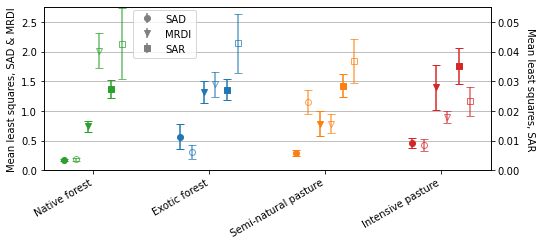

In [8]:
# With grid

# Another option with separate axis for SAR, with alt colors
# Use existing colors according to site, shape represents analysis
# Plot the mean least squares
fig,ax = plt.subplots(figsize=(8,3))
y2 = ax.twinx()
clist = ['tab:blue','tab:green','tab:red','tab:orange']
xlist = np.array([2,1,4,3])
for i in np.arange(len(clist)):
    # Indigenous ones
    ax.errorbar(x=xlist[i]-0.2,y=sad_mlsq_i.loc['Mean indigenous'][i],
                yerr=sad_mlsq_i.loc['Standard error indigenous'][i],
                 fmt='o',capsize=4,c=clist[i],label='SAD')
    ax.errorbar(x=xlist[i],y=mrdi_mlsq_i.loc['Mean (idg)'][i],
                yerr=mrdi_mlsq_i.loc['Standard error (idg)'][i],
                 fmt='v',capsize=4,c=clist[i],label='MRDI')
    y2.errorbar(x=xlist[i]+0.2,y=sar_mlsq_i.loc['Mean (idg)'][i],
                yerr=sar_mlsq_i.loc['Standard error (idg)'][i],
                 fmt='s',capsize=4,c=clist[i],label='SAR')
    # Introduced
    al = 0.7 # Alpha value
    ax.errorbar(x=xlist[i]-0.1,y=sad_mlsq_i.loc['Mean introduced'][i],
                yerr=sad_mlsq_i.loc['Standard error introduced'][i],
                 fmt='o',capsize=4,c=clist[i],alpha=al,markerfacecolor='none',label='SAD')
    ax.errorbar(x=xlist[i]+0.1,y=mrdi_mlsq_i.loc['Mean (int)'][i],
                yerr=mrdi_mlsq_i.loc['Standard error (int)'][i],
                 fmt='v',capsize=4,c=clist[i],alpha=al,markerfacecolor='none',label='MRDI')
    y2.errorbar(x=xlist[i]+0.3,y=sar_mlsq_i.loc['Mean (int)'][i],
                yerr=sar_mlsq_i.loc['Standard error (int)'][i],
                 fmt='s',capsize=4,c=clist[i],alpha=al,markerfacecolor='none',label='SAR')
    # For the legend
    if (i == len(clist)-1):
        psad = ax.errorbar(x=[],y=[],yerr=[],
                     fmt='o',capsize=4,c='tab:gray',label='SAD')
        pmrdi = ax.errorbar(x=[],y=[],yerr=[],
                     fmt='v',capsize=4,c='tab:gray',label='MRDI')
        psar = y2.errorbar(x=[],y=[],yerr=[],
                     fmt='s',capsize=4,c='tab:gray',label='SAR')
        # Explain filled/unfilled in caption

# Labels
ax.set_ylabel('Mean least squares, SAD & MRDI')
y2.set_ylabel('Mean least squares, SAR',rotation=270,labelpad=15)

# Set 0 scale
ax.set_ylim(0,2.75)
y2.set_ylim(0,0.055)

# Legend
lns = [psad, pmrdi, psar]
ax.legend(handles=lns,loc=(0.2,0.69))

# x-ticks for ax
ax.xaxis.set_ticks([2.05,1.05,4.05,3.05])
ax.set_xticklabels(xlabelsi, rotation = 30,ha='right')

# y-ticks and grid
y2.set_yticks(np.linspace(0.0, 0.05, len(ax.get_yticks())-1))
# Just make one grid, and just for y-axis
ax.yaxis.grid(True)
#y2.yaxis.grid(True) # Just to test they overlap
#ax.xaxis.grid(True,which='minor')

plt.savefig("Figures/means_together_indigenous_grid.pdf",bbox_inches='tight')

# SI

## KS

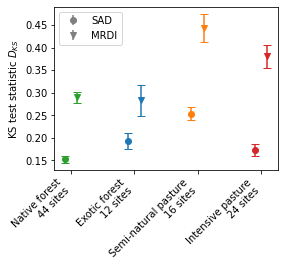

In [12]:
# KS together

# Plot the mean least squares
plt.figure(figsize=(4,3))
# Make color dictionarry
clist = {lu[1]:'tab:green',lu[0]:'tab:blue',lu[3]:'tab:orange',lu[2]:'tab:red'}
xlist = {lu[1]:1, lu[0]:2, lu[3]:3, lu[2]:4}

for l in lu:
    plt.errorbar(x=xlist[l]-0.1,y=sad_ks.loc['means',l],yerr=sad_ks.loc['se',l],
             fmt='o',c=clist[l],capsize=4,label='SAD')
    plt.errorbar(x=xlist[l]+0.1,y=mrdi_ks.loc['Mean',l],yerr=mrdi_ks.loc['Standard error',l],
             fmt='v',c=clist[l],capsize=4,label='MRDI')

plt.ylabel(r'KS test statistic $D_{KS}$')

plt.xticks([2,1,4,3],['{}\n{} sites'.format(l,lu_sites[l]) for l in lu],
           rotation=45,ha='right')

# Legend (requires previous cell)
lns = [psad, pmrdi]
plt.legend(handles=lns, loc='upper left')

plt.savefig("Figures/SI/KSD_together.pdf",bbox_inches='tight')

## For combined

In [10]:
# Read in
#SAD
comm_sad = pd.read_csv('ProcessedData/sad_combined_data.csv')
comm_sad_mlsq = comm_sad['mlsq'].values
#Native forest           0.491278
#Exotic forest           0.689149
#Semi-natural pasture    1.257251
#Intensive pasture       0.331208
#MRDI
comm_mrdi = pd.read_csv('ProcessedData/mrdi_combined_data.csv')
comm_mrdi_mlsq = comm_mrdi['mlsq'].values
#Native forest	0.378824
#Exotic forest	0.260345
#Semi-natural pasture	1.253413
#Intensive pasture	1.391150

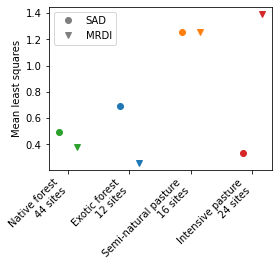

In [11]:
# Plot least squares

# Set up 
clist = ['tab:green','tab:blue','tab:orange','tab:red']
xlist = np.arange(4)+1
# Plot
plt.figure(figsize=(4,3))
for i in np.arange(len(clist)):
    plt.plot(xlist[i],comm_sad_mlsq[i],'o',c=clist[i],label='SAD')
    plt.plot(xlist[i]+0.3,comm_mrdi_mlsq[i],'v',c=clist[i],label='MRDI')

plt.ylabel('Mean least squares')
plt.xticks(xlist+0.15,['{}\n{} sites'.format(l,lu_sites[l]) for l in [lu[1],lu[0],lu[3],lu[2]]],
           rotation=45,ha='right')
# Legend
sadl, = plt.plot([],[],'o',c='tab:gray',label='SAD')
mrdil, = plt.plot([],[],'v',c='tab:gray',label='MRDI')
lns = [sadl,mrdil]
plt.legend(handles=lns, loc='best')

plt.savefig('Figures/SI/means_together_community_level.pdf',bbox_inches='tight')